In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def parse_files(root, num):
  xtilda =  []
  for i in range(1, (num*10)+1):
    pixels = plt.imread(root+str(i)+'.jpg')
    pixels = np.where(pixels>140, 1, 0)
    pixels = np.append(pixels, 1)
    xtilda.append(pixels)
    
  xtilda = np.array(xtilda)  
#   delete the ones column
  xtilda = np.delete(xtilda, 784, axis=1)
  return xtilda

In [3]:
def in_list(np_arr, list):
    for element in list:
        if np.array_equal(np_arr, element):
            return True
    return False

In [4]:
def initialize_means(random_index, x_train):
    #     np.random.randint(low=0, high=2400)
    means= []
    distances = []
    m = x_train[random_index]
    means.append(m)
    # do this 9 times to find 9 means (we already have one initialized randomly)
    for c in range(0, 9):
        distances = []
        for i in range(0, len(x_train)):
                distances.append(np.linalg.norm(x_train[i]-m))
        distances = np.array(distances)
        # get the indices of the 10 max elements (in case a max element is already a mean, we pick antother)
        max_indices = np.argpartition(distances, -10)[-10:]
        # pick a max element that is not in the means list
        for index in max_indices:
            if not(in_list(x_train[index], means)):
                m = x_train[index]
                break
        means.append(m)
    means = np.array(means)  
    return means

In [5]:
def get_rnk(means, x_train):
    rnk = []
    distances = []
    for image in x_train:
        distances = []
        # compute the distance to all other centers
        for mean in means:
            distances.append(np.linalg.norm(image-mean))
        # find the smallest distance index
        distances = np.array(distances)
        rnk.append(np.argmin(distances))
    rnk = np.array(rnk)
    return rnk

In [6]:
def update_means(x_train, rnk):
    unique_vals = np.unique(rnk)
    means = []
    for i in range(0, len(unique_vals)):
        # find indices in x_train at which these rnk values exist
        indices = np.argwhere(rnk ==i)
        indices = indices.flatten()
        m = (x_train[indices].sum(axis=0))/len(indices)
        means.append(m)
    means = np.array(means)
    return means

In [7]:
def k_means(x_train, init_means):
    old_means = init_means
    new_means = np.array([])
    counter=0
    while(not(np.array_equal(old_means, new_means))):
        if(counter!=0):
            old_means = new_means
        rnk = get_rnk(old_means, x_train)
        new_means = update_means(x_train, rnk)
        counter+=1
    return new_means

In [8]:
def get_counts(membership_vector):
    parts = np.split(membership_vector, 10)
    freq=[]
    for i in range(0, 10):
        f = np.bincount(parts[i]).argmax()
        freq.append(f)

    # eg. [3, 0, 6, 5, 9, 5, 4, 7, 2, 2]
    counts=[]
    for i in range(0, 10):
        count = len(np.where(parts[i]==freq[i])[0])
        counts.append(count)
    counts = np.array(counts)
    return counts

In [9]:
def repeat_30(x_train):
     # should have the shape (30, 10, 784) where we have (10, 784) in each iteration
    means_30=[]
    # should have the shape (30, 2400) where we have (2400,) rnk in each iteration
    memberships_30=[]
    random_indices = np.random.choice(range(0,2399), size=30, replace=False)
    for random_index in random_indices:
        init_means = initialize_means(random_index, x_train)
        means = k_means(x_train, init_means)
        membership = get_rnk(means, x_train)
        means_30.append(means)
        memberships_30.append(membership)
    means_30 = np.array(means_30)
    memberships_30 = np.array(memberships_30)
    return means_30, memberships_30

In [10]:
x_train = parse_files('C:\\Users\\Sarah\\Desktop\\semester 9\\Machine Learning\\Assignment3 ML\\Images\\', 240)
means30, memberships30 = repeat_30(x_train)

In [11]:
# should have 30 values
clusters_distances = []
for i in range(0, 30):
    means = means30[i]
    memberships = memberships30[i]
    # compute the distance between each point and its centroid, then sum them up
    distances = []
    for j in range(0, 2400):
        m = memberships[i]
        distances.append(np.linalg.norm(x_train[j]-means[m]))
    # now the distances list is of length 2400
    distances = np.array(distances)
    clusters_distances.append(np.sum(distances))
clusters_distances = np.array(clusters_distances)
clusters_distances

array([23812.79996349, 23311.78537024, 23205.33258281, 23898.0295203 ,
       23910.10863638, 24737.91741765, 23720.35712797, 23796.29818233,
       23892.15920683, 23822.16432875, 21618.77983437, 23965.1767889 ,
       23747.82707744, 24163.74268133, 23853.75284345, 23925.27641843,
       23805.97412684, 23839.6128781 , 24016.76035967, 20891.44600572,
       22399.39720928, 24014.85950045, 25034.29552464, 20975.84050671,
       20992.33626335, 23870.55003966, 21566.57097481, 23578.04361262,
       23773.11284043, 23974.96213215])

In [12]:
chosen_cluster = np.argmin(clusters_distances)
chosen_cluster

19

<b> <h3>The best initialization is the one that produced minimum within cluster distance</h3> </b>

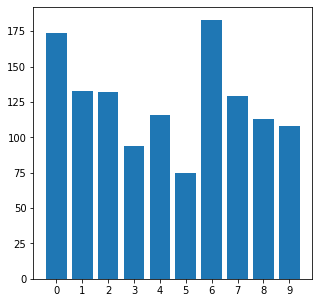

In [13]:
# get the counts for this cluster
counts = get_counts(memberships30[chosen_cluster])
x = [0,1,2,3,4,5,6,7,8,9]
y = counts
plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.xticks(x)
plt.savefig('Counts.jpg')
plt.show()